# Task6: Predicting Real Estate House Prices

## This task is provided to test your understanding of building a Linear Regression model for a provided dataset

### Dataset: Real_estate.csv

### Import the necessary libraries
#### Hint: Also import seaborn

In [3]:
import seaborn as sns
import pandas as pd

### Read the csv data into a pandas dataframe and display the first 5 samples

In [4]:
df = pd.read_csv("Real_estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


### Show more information about the dataset

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


### Find how many samples are there and how many columns are there in the dataset

In [6]:
df.shape

(414, 8)

### What are the features available in the dataset?

In [7]:
df.keys()

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Check if any features have missing data

In [8]:
missing = df.isnull().sum()
print(missing)



No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64


### Group all the features as dependent features in X

In [47]:
x = df.iloc[:,:-1]
X = x.to_numpy()




### Group feature(s) as independent features in y

In [48]:
y = df.iloc[:,-1]
Y = y.to_numpy()

### Split the dataset into train and test data

In [81]:
import numpy as np
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y,test_size=0.3,random_state= 1)
x_train, x_test, y_train, y_test

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)


(289, 7)
(289,)
(125, 7)
(125,)


### Choose the model (Linear Regression)

In [53]:
from sklearn.linear_model import LinearRegression

### Create an Estimator object

In [110]:
linreg = LinearRegression()



LinearRegression()

### Train the model

In [111]:
linreg.fit(x_train, y_train)

LinearRegression()

### Apply the model

In [90]:
y_pred = linreg.predict(x_test)
y_pred.shape

(125,)

### Display the coefficients

In [70]:
print (linreg.coef_)

[-4.15431832e-03  4.00786710e+00 -2.30222068e-01 -4.20874721e-03
  1.18429933e+00  2.20589799e+02 -4.59046240e+00]


### Find how well the trained model did with testing data

In [92]:
from sklearn import metrics

print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

linreg.score(x_test,y_test)


10.272693478868806


0.5420277763711289

### Plot House Age Vs Price
#### Hint: Use regplot in sns

<AxesSubplot:xlabel='X2 house age', ylabel='Y house price of unit area'>

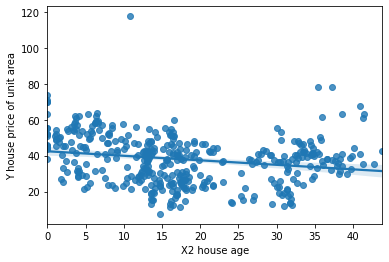

In [104]:
import seaborn as sns 

sns.regplot( x='X2 house age', y='Y house price of unit area',data= df ,fit_reg=True)

In [105]:
df.columns

Index(['No', 'X1 transaction date', 'X2 house age',
       'X3 distance to the nearest MRT station',
       'X4 number of convenience stores', 'X5 latitude', 'X6 longitude',
       'Y house price of unit area'],
      dtype='object')

### Plot Distance to MRT station Vs Price

<AxesSubplot:xlabel='X3 distance to the nearest MRT station', ylabel='Y house price of unit area'>

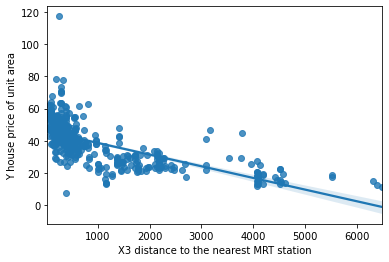

In [108]:
sns.regplot( x='X3 distance to the nearest MRT station', y='Y house price of unit area', data= df,fit_reg=True)

### Plot Number of Convienience Stores Vs Price

<AxesSubplot:xlabel='X4 number of convenience stores', ylabel='Y house price of unit area'>

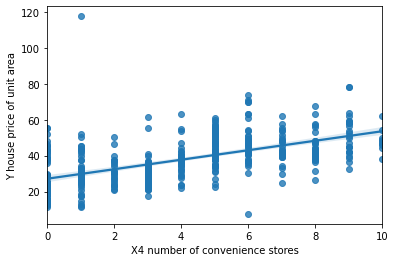

In [109]:
sns.regplot( x='X4 number of convenience stores', y='Y house price of unit area', data= df, fit_reg=True)